### Paola Della Foglia matr. 961014

# <span style="color:red"> Esercitazione numerica 3</span>

## <span style="color:blue"> Esercizio 03.1</span>
### Scopo
Lo scopo dell'esercizio è di stimare il prezzo di un'opzione europea put o call, campionando direttamente il prezzo dell'asset finale per un $GBM(r,\sigma^2)$ e campionando il percorso discretizzato $GBM(r,\sigma^2)$ dal prezzo dell'asset</span> 
dividendo $[0,T]$ in $10^2$ in intervalli di tempo: $S(0)$, $S(t_1)$, $S(t_2)$, ... fino a $S(t_{100}=T=1)$. 

Utilizzeremo i parametri seguenti:
- prezzo dell'asset a $t=0$: $S(0)=100$
- tempo di consegna: $T=1$
- prezzo esercizio: $K=100$
- tasso d'interesse privo di rischio: $r=0.1$
- volatilità: $\sigma=0.25$

### Compilazione
Il codice si trova nella cartella <font face = "Courier"> ex03.1 </font>. Per compilare, digitare da shell unix il comando <font face = "Courier"> `$make` </font> ed eseguire con il comando <font face = "Courier"> `$./main.exe` </font>. Si ottengono così 4 files in output: due di essi contengono una stima per l'opzione put rispettivamente per i casi diretto e discreto (<i>'Put_direct.txt', 'Put_discrete.txt'</i>), e gli altri due , invece , contengono una stima per l'opzione call sempre per i casi diretto e discreto (<i>'Call_direct.txt', 'Call_discrete.txt'</i>).

### Opzione-Put Europea (caso diretto)
Per simulare il prezzo finale dell'asset, $S(T=1)$, da $S\sim GBM(\mu,\sigma^2)$, usiamo la formula seguente:

$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    dove $S(0)$ è il prezzo iniziale e $W(t)\sim\mathcal{N}(0,t)$. Il prezzo che dovrebbe avere l'opzione-Put è:
    
$$e^{-rT} \max\big(0, K-S(T)\big)$$

il fattore $e^{-rT}$ è dovuto all'interesse che una banca avrebbe garantito con un deposito al tempo $t_0=0$.
Ora ci limitiamo a simulare $N=10^4$ GBM e a calcolare il valor medio e l'errore quadratico medio usando "metodo a blocchi".

Il valore plottato in funzione del numero di simulazioni è:

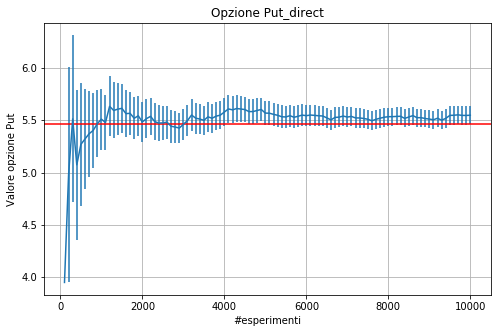

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 5]
x, y, error = np.loadtxt("ex03.1/Put_direct.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,y,yerr=error)
plt.xlabel('#esperimenti')
plt.ylabel('Valore opzione Put')
plt.axhline(y=5.459533,color='red')
plt.grid(True)
plt.title("Opzione Put_direct")
axes = plt.gca()
#axes.set_ylim([4,6.5])
plt.show()

La linea rossa, indica il $valore$ $atteso$ dell'opzione-Put europea, calcolato in $modo$ $diretto$, tramite la soluzione analitica del problema $Black-Scholes$.
Il risultato ottenuto per il prezzo finale dell'opzione-Put (linea blu) è soddisfacente e quindi compatibile con il suo valore atteso (linea rossa) in quanto le barre d'errore toccano il valore atteso dell'opzione-Put.

### Opzione-Call Europea (caso diretto)
Ciò che cambia rispetto all'opzione-Put è il prezzo che dovrebbe avere l'opzione-Call: 

$$e^{-rT} \max\big(0, S(T)-K\big)$$

Si ottiene:

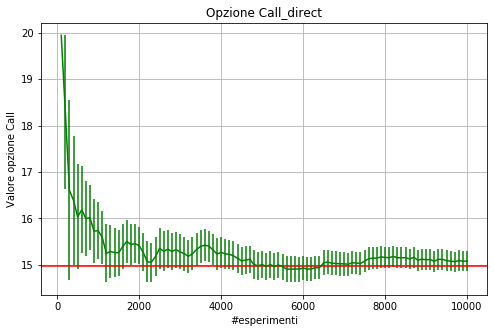

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 5]

x, y, error = np.loadtxt("ex03.1/Call_direct.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,y,yerr=error,color='green')
plt.xlabel('#esperimenti')
plt.ylabel('Valore opzione Call')
plt.axhline(y=14.975791,color='red')
plt.grid(True)
plt.title("Opzione Call_direct")
axes = plt.gca()
#axes.set_ylim([4,6.5])
plt.show()

I valori ottenuti per le opzioni Call e Put sono compatibili con la soluzione analitica del problema di Black-Scholes:

- call:  14.975790778311286
- put:  5.4595325819072364

#### Opzione-Put Europea (caso discreto)
Poichè gli incrementi di $W$ sono indipendenti e normalmente distribuiti, si può passare semplicemente $S(T=1)$ a valori discreti di $S\sim GBM(\mu,\sigma^2)$ a $t_1 < t_2 < … < t_n$:

$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$

con $Z_i \sim \mathcal{N}(0,1)$

Ciò che ci aspettiamo è di ottenere lo stesso valore che abbiamo ottenuto sopra (vedi opzione_Put caso diretto).

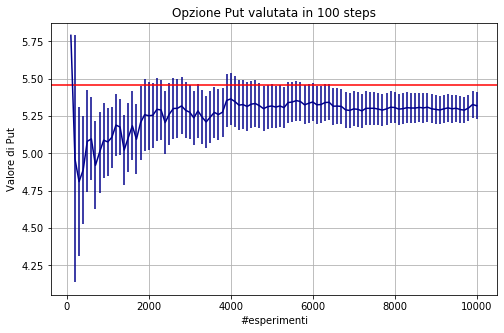

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 5]

x, y, error = np.loadtxt("ex03.1/Put_discreto.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,y,yerr=error, color='darkblue')
plt.xlabel('#esperimenti')
plt.ylabel('Valore di Put')
plt.axhline(y=5.459533,color='red')
plt.grid(True)
plt.title("Opzione Put valutata in 100 steps")
plt.show()

La linea rossa, indica il  $valore$ $atteso$  dell'opzione-Put europea, calcolato in  $modo$ $discreto$ , tramite la soluzione analitica del problema  $Black-Scholes$ . Il risultato ottenuto per il prezzo finale dell'opzione-Put (linea blu) è soddisfacente e quindi compatibile con il suo valore atteso (linea rossa) in quanto le barre d'errore toccano il valore atteso dell'opzione-Put.

### Opzione-Call Europea (caso discreto)

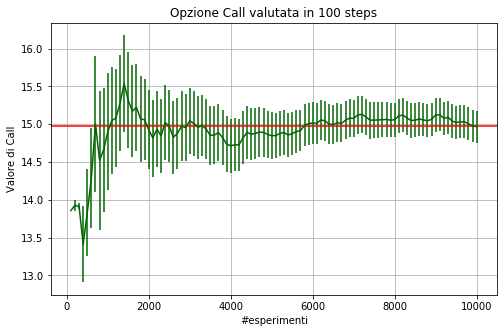

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 5]

x, y, error = np.loadtxt("ex03.1/Call_discreto.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,y,yerr=error,color='darkgreen')
plt.xlabel('#esperimenti')
plt.ylabel('Valore di Call')
plt.axhline(y=14.975791,color='red')
plt.grid(True)
plt.title("Opzione Call valutata in 100 steps")
plt.show()

Le due procedure, caso diretto e discreto, introdotte per determinare il prezzo delle opzioni europee Put e Call, possiamo dire essere equivalenti. Tuttavia, in problemi più complessi, ossia che richiedono maggior potenza di calcolo, il primo metodo (caso diretto da $T_{in}$ a $T_{fin}$) è migliore dal punto di vista computazionale in quanto abbiamo bisogno solo di un calcolo per ottenere $S(T=1)$ anzichè 100 steps.